In [21]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
import glob
import os
import datetime

import seaborn as sns
sns.set()

run_date = datetime.date.today().strftime("%Y-%m-%d")

In [2]:
# load data
all_files = glob.glob('*.csv')
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col = None, header = 0)
    li.append(df)

jobs_df = pd.concat(li, axis = 0, ignore_index = True)

In [3]:
# Clean up data
jobs_df['run_date'] = pd.to_datetime(jobs_df['run_date'])
jobs_df

,category,job_title,page_link,job_id,location,run_date
0,All Departments,California Campaign Intern,https://boards.greenhouse.io/bernie2020/jobs/4...,4274391002,California,2019-11-14
1,All Departments,Campaign Intern,https://boards.greenhouse.io/bernie2020/jobs/4...,4274408002,Iowa,2019-11-14
2,All Departments,Campaign Intern,https://boards.greenhouse.io/bernie2020/jobs/4...,4263816002,"Washington, DC",2019-11-14
3,All Departments,General Application,https://boards.greenhouse.io/bernie2020/jobs/4...,4231325002,Multiple Locations,2019-11-14
4,All Departments,HQ Campaign Intern,https://boards.greenhouse.io/bernie2020/jobs/4...,4274405002,"Washington, DC",2019-11-14
5,All Departments,Iowa Student Intern,https://boards.greenhouse.io/bernie2020/jobs/4...,4461162002,Iowa,2019-11-14
6,All Departments,Nevada Campaign Intern,https://boards.greenhouse.io/bernie2020/jobs/4...,4274412002,Nevada,2019-11-14
7,All Departments,Nevada Youth Field Fellowship Intern,https://boards.greenhouse.io/bernie2020/jobs/4...,4334036002,Nevada,2019-11-14
8,All Departments,New Hampshire Campaign Intern,https://boards.greenhouse.io/bernie2020/jobs/4...,4274418002,New Hampshire,2019-11-14
9,All Departments,New Hampshire Intern,https://boards.greenhouse.io/bernie2020/jobs/4...,4272302002,New Hampshire,2019-11-14


In [6]:
# Get Count of all jobs by date
run_date_counts = jobs_df.groupby('run_date').count()[['job_id']]
run_date_counts

,job_id
run_date,
2019-11-14,51
2019-11-15,67
2019-11-16,68
2019-11-17,65
2019-11-18,72


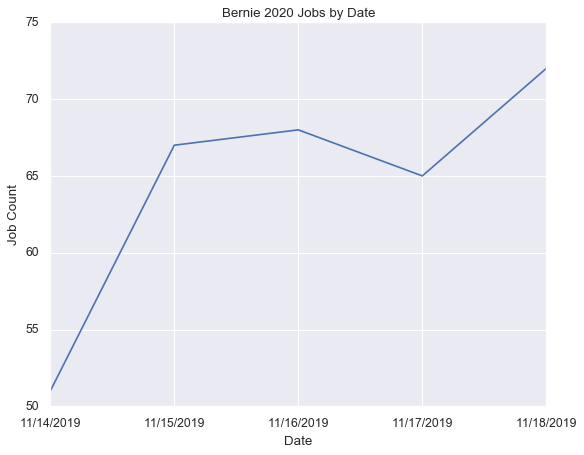

In [24]:
import matplotlib.dates as mdates
x = run_date_counts.index
y = run_date_counts['job_id']
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Job Count')
plt.title('Bernie 2020 Jobs by Date')
# Save chart 
plt.savefig(run_date + '_JobsByDate.png')
plt.show()


<Figure size 640x480 with 0 Axes>